# Chapter 8: Integration Techniques, L'H&ocirc;pital's Rule, and Improper Integrals

### Section 8.6: Numerical Integration

### Section Objectives:
##### Objective 1: Approximate a definite integral using the Trapezoidal Rule
##### Objective 2: Approximate a definite integral using Simpson's Rule
##### Objective 3: Analyze the approximate errors in the Trapezoidal Rule and Simpson's Rule

##### Objective 1: Approximate a definite integral using the Trapezoidal Rule

In this section we consider definite integrals that would be either very tough or impossible to do by hand. For example

$$\int_0^1 e^{-x^2} \, dx \\ \int_1^3 \cfrac{\cos{x}}{x} \, dx \\ \int_0^1 \sin{(e^x)} \, dx$$

##### Numerical Methods

* There are many numerical schemes for approximating definite integrals over an inteveral $[a, b]$
* We will turn our focus to only two of these schemes:
    * Trapezoidal Rule
        * Divide the interval $[a, b]$ into $n$ subintervals
        * Over each subinterval we use linear interpolation
        * Geometrically, really we are approximating using trapezoids (similar to Riemann integral with rectangles)
    * Simpson's Rule
        * Divide the interval $[a, b]$ into $n$ ($n$ must be *even*) subintervals
        * Over each subinterval we use quadratic interpolation
        * Using quadratic interpolation provides us with quicker convergence over the Trapezoidal Rule as we'll see

##### Trapezoidal Rule Conceptualization

One way to think about the Trapezoidal Rule is by approximating the curve using linear functions on each subinterval of the interval of integration.

Let's consider the function $f(x) = \sin(e^x)$ on the interval from $[0, 1]$:

In [1]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('fivethirtyeight')

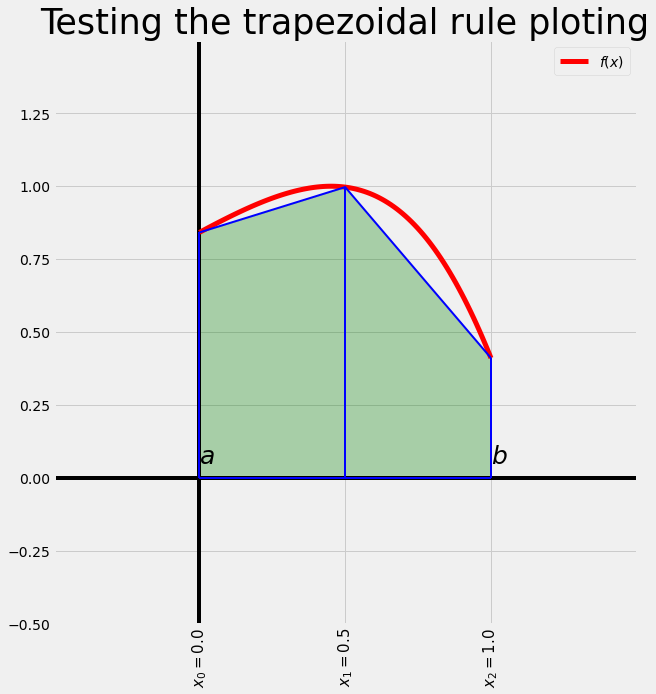

In [2]:
def f(x):
    return np.sin(np.exp(x))

a = 0
b = 1
n = 2
delta = (b - a) / n

delta_x = np.arange(a, b + delta, delta)
delta_y = f(delta_x)

x = np.linspace(a,b,100)
y = f(x)

fig, ax = plt.subplots(figsize = (25,10))

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.annotate('$a$', (a,0.05), fontsize = 25)
ax.annotate('$b$', (b,.05), fontsize = 25)

ax.plot(x,y, color='red', lw=5, label = '$f(x)$')
ax.plot(delta_x, delta_y, color='blue', lw=2)
ax.fill_between(delta_x, np.zeros(len(delta_x)), f(delta_x), color = 'green', alpha = .3)
for i, p in enumerate(delta_x):
    ax.plot([delta_x[i], delta_x[i]], [0, delta_y[i]], color = 'blue', lw = 2)
    if i < len(delta_x) - 1:
        ax.plot([delta_x[i],delta_x[i] + delta], [0,0], color = 'blue', lw = 2)

ax.set_xlim(a - 0.5,b + 0.5)
ax.set_ylim(-.5, max(f(x)) + 0.5)
xticks = np.arange(a, b + delta, delta)
ax.set_xticks(xticks)
ax.set_xticklabels(
    [r'$x_{} = {:.3}$'.format('{' + str(i) + '}', a + i*delta) for i, p in enumerate(xticks)],
    rotation = 90, fontsize = 15)
ax.set_title('Testing the trapezoidal rule ploting', fontsize = 35)
ax.set_aspect('equal')
ax.legend()

##### Formulation of the Trapezoidal Rule

* Area of a trapezoid: $A_{\text{trap}} = \frac{h}{2} (b_1 + b_2)$
* The two bases $b_1$ and $b_2$ are the vertical sides of the trapezoids formed
    * i.e. $b_1 = f(x_{i - 1})$ and $b_2 = f(x_{i})$ for the $i$th subinterval, $[x_{i - 1}, x_{i}]$
* The height of each trapezoid is $\Delta x = \frac{b - a}{n}$

Putting this together for $n$ subintervals:

\begin{align}
\sum_{i = 1}^{n}{A_i} & = \sum_{i = 1}^{n}{\cfrac{h}{2} \left( f(x_{i-1}) + f(x_i) \right)} \\
& = \cfrac{1}{2} \sum_{i = 1}^{n}{\left( f(x_{i-1}) + f(x_i) \right) \Delta x} \\
& = \cfrac{1}{2} \sum_{i = 1}^{n}{\left( f(x_{i-1}) + f(x_i) \right) \cfrac{b - a}{n}} \\
& = \cfrac{b - a}{2n} \sum_{i = 1}^{n}{\left( f(x_{i-1}) + f(x_i) \right)} \\
& = \cfrac{b - a}{2n} \left( [f(x_0) + f(x_1)] + [f(x_1) + f(x_2)] + [f(x_2) + f(x_3)]  \right. \\
& \qquad \qquad \qquad \left. + \cdots + [f(x_{n - 2}) + f(x_{n-1})] + [f(x_{n - 1}) + f(x_n)] \right) \\
& = \cfrac{b - a}{2n} \left( f(x_0) + 2f(x_1) + 2f(x_2) + 2f(x_3) \right. \\
& \qquad \qquad \left. + \cdots + 2f(x_{n - 2}) + 2f(x_{n-1}) + f(x_n) \right) \\
& = \cfrac{b - a}{2n} \left( f(x_0) + 2\sum_{i = 1}^{n-1}{f(x_{i})} + f(x_n) \right) \\
& = \cfrac{b - a}{2n} \left( f(a) + 2\sum_{i = 1}^{n-1}{f(x_{i})} + f(b) \right)
\end{align}

##### Trapezoidal Rule

Let $f$ be a continuous function on $[a, b]$. The Trapezoidal Rule for approximating $\displaystyle \int_a^b f(x) \, dx$ is given by $$\int_a^b f(x) \approx \cfrac{b - a}{2n} \left( f(x_0) + 2f(x_1) + 2f(x_2) + \cdots + 2f(x_{n-1}) + f(x_n) \right).$$ As $n \rightarrow \infty$ the Trapezoidal Rule converges to $\int_a^b f(x) \, dx$.

##### Example 1

Use the Trapezoidal Rule to approximate $\displaystyle \int_{-1}^{1} \sqrt{1 - x^2} \, dx$

**(a)** with $n = 4$

**(b)** with $n = 8$

**(c)** Then compare to the exact solution

##### Solution:

Before we begin:

* First note that the function in the integrand $f(x) = \sqrt{1 - x^2}$ is the top half of the circle centered at the origin with radius $r = 1$
    * Recall the equation of the circle centered at the origin with radius $r = 1$ is given by $x^2 + y^2 = 1$ and solving for $y = f(x)$ and taking the *positive* value yields the function above
* We are evaluating the integral between $x = a = -1$ and $x = b = 1$
    * i.e. we are evaluating the area under the curve for *half* a circle
* The *exact* solution is $A = A_{\text{half circ}} = \pi r^2 / 2 = \pi (1)^2 / 2 = \pi / 2$
* Let's see how this compares to our results for approximating using the Trapezoidal Rule

Use the Trapezoidal Rule to approximate $\displaystyle \int_{-1}^{1} \sqrt{1 - x^2} \, dx$

**(a)** Use $n = 4$

* Note that $a = -1$ and $b = 1$
* Compute $\Delta x$:
    $$\Delta x = \cfrac{b - a}{n} \\
    \Delta x = \cfrac{1 - (-1)}{4} \\
    \Delta x = \cfrac{1}{2}$$
* Based on $a$ and $\Delta x$ find each $x_i$:

\begin{align}
        x_0 & = a = -1 \\
        x_1 & = -1 + 1/2 = -1/2 \\
        x_2 & = -1/2 + 1/2 = 0 \\
        x_3 & = 0 + 1/2 = 1/2 \\
        x_4 & = 1/2 + 1/2 = 1 = b
\end{align}

* Find $f(x_i)$ for $i = 0, 1, 2, \dots , n$:

\begin{align}
        f(x_0) & = f(a) = f(-1) = 0 \\
        f(x_1) & = f(-1/2) = \sqrt{3/4} \\
        f(x_2) & = f(0) = 1 \\
        f(x_3) & = f(1/2) = \sqrt{3/4} \\
        f(x_4) & = f(b) = f(1) = 0
\end{align}

* Apply the Trapezoidal Rule formula:

\begin{align}
        \int_{-1}^{1} \sqrt{1 - x^2} \, dx & \approx \frac{1 - (-1)}{2(4)} \left( f(-1) + 2f(-1/2) + 2f(0) + 2f(1/2) + f(1) \right) \\
        & \approx \frac{2}{8} \left( 0 + 2\sqrt{3/4} +2(1) + 2\sqrt{3/4} + 0 \right) \\
        & \approx \frac{1}{4} \left( 2 \sqrt{3/4} + 2 + 2 \sqrt{3/4} \right) \\
        & \approx \boxed{1.3660} \qquad \text{(rounded to 4 decimal places)}
\end{align}

Use the Trapezoidal Rule to approximate $\displaystyle \int_{-1}^{1} \sqrt{1 - x^2} \, dx$

**(b)** with $n = 8$

* Note that $a = -1$ and $b = 1$
* Compute $\Delta x$:
    $$\Delta x = \cfrac{b - a}{n} \\
    \Delta x = \cfrac{1 - (-1)}{8} \\
    \Delta x = \cfrac{1}{4}$$
* Based on $a$ and $\Delta x$ find each $x_i$:

\begin{align}
        x_0 & = a = -1 \\
        x_1 & = -1 + 1/4 = -3/4 \\
        x_2 & = -3/4 + 1/4 = -1/2 \\
        x_3 & = -1/2 + 1/4 = -1/4 \\
        x_4 & = -1/4 + 1/4 = 0 \\
        x_5 & = 0 + 1/4 = 1/4 \\
        x_6 & = 1/4 + 1/4 = 1/2 \\
        x_7 & = 1/2 + 1/4 = 3/4 \\
        x_8 & = 3/4 + 1/4 = 1 = b
\end{align}

* Find $f(x_i)$ for $i = 0, 1, 2, \dots , n$:

\begin{align}
        f(x_0) & = f(a) = f(-1) = 0 \\
        f(x_1) & = f(-3/4) = \sqrt{7/16} \\
        f(x_2) & = f(-1/2) = \sqrt{3/4} \\
        f(x_3) & = f(-1/4) = \sqrt{15/16} \\
        f(x_4) & = f(0) = 1 \\
        f(x_5) & = f(1/4) = \sqrt{15/16} \\
        f(x_6) & = f(1/2) = \sqrt{3/4} \\
        f(x_7) & = f(3/4) = \sqrt{7/16} \\
        f(x_8) & = f(b) = f(1) = 0 \\
\end{align}

* Apply the Trapezoidal Rule formula:

\begin{align}
        \int_{-1}^{1} \sqrt{1 - x^2} \, dx & \approx \frac{1 - (-1)}{2(8)} \left( f(-1) + 2f(-3/4) + 2f(-1/2) + f(-1/4) \right. \\ 
        & \qquad \qquad \left. + 2f(0) + 2f(1/4) + 2f(1/2) + f(3/4) + f(1) \right) \\
        & \approx \frac{2}{16} \left( 0 + 2\sqrt{7/16} + 2\sqrt{3/4} + 2\sqrt{15/16} \right. \\
        & \qquad \qquad \left. + 2(1) + \sqrt{15/16} + \sqrt{7/16} + 0 \right) \\
        & \approx \frac{1}{8} \left( 2\sqrt{7/16} + 2\sqrt{3/4} + 2\sqrt{15/16} + 2 + 2\sqrt{3/4} + 2\sqrt{15/16} + 2\sqrt{7/16} \right) \\
        & \approx \boxed{1.4979} \qquad \text{(rounded to 4 decimal places)}
\end{align}

**(c)** Then compare to the exact solution

The exact result is $A = \pi/2 \approx 1.5708$. The Trapezoidal Rule for $n = 8$ is a better approximation than when $n = 4$. Both results are an underestimate, but when $n = 8$ we are closer to the exact solution. If we continued to increase $n$, we would approach the exact solution.

##### Objective 2: Approximate a definite integral using Simpson's Rule

##### Simpson's Rule Conceptualization

One way to think about Simpson's Rule is by approximating the curve using quadratic functions on each subinterval of the interval of integration.

Again, we consider the function $f(x) = \sin(e^x)$ on the interval from $[0, 1]$:

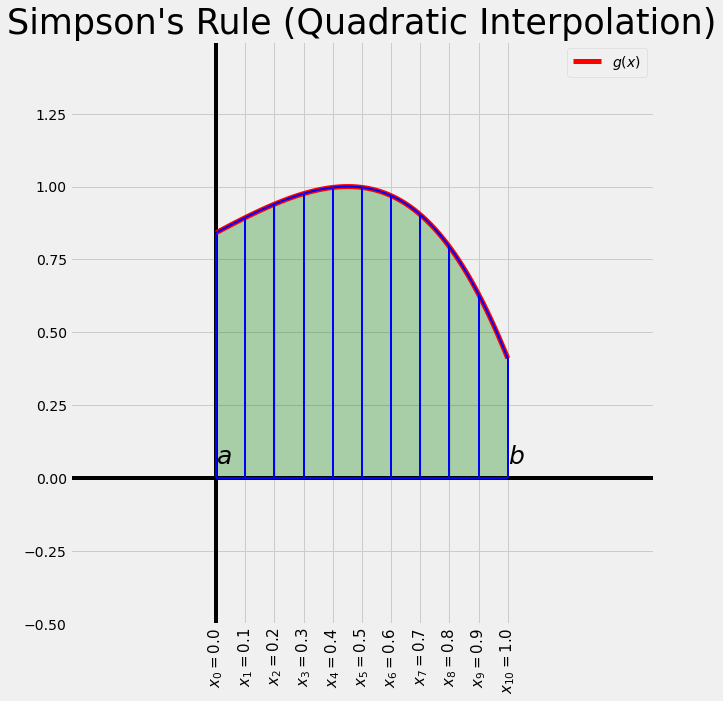

In [3]:
def g(x):
    return np.sin(np.exp(x))
#    return 2*np.exp(-x**2) + np.exp(-1/x**2) + 1/10*x**2

def P(x, a, b, func):
    m = (a + b) / 2
    f_a = func(a)
    f_m = func(m)
    f_b = func(b)
    term1 = f_a * (x - b) * (x - m) / ((a - b) * (a - m))
    term2 = f_m * (x - a) * (x - b) / ((m - a) * (m - b))
    term3 = f_b * (x - a) * (x - m) / ((b - a) * (b - m))
    return term1 + term2 + term3

a = 0
b = 1
n = 10
delta = (b - a) / n

delta_x = np.arange(a, b + delta, delta)
delta_y = g(delta_x)

x = np.linspace(a, b, 100)
y = g(x)

fig, ax = plt.subplots(figsize = (25, 10))

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.annotate('$a$', (a,0.05), fontsize = 25)
ax.annotate('$b$', (b,.05), fontsize = 25)

ax.plot(x, y, color = 'red', lw = 5, label = '$g(x)$')

for i, p in enumerate(delta_x):
    ax.plot([delta_x[i], delta_x[i]], [0, delta_y[i]], color = 'blue', lw = 2)
    if i < len(delta_x) - 1:
        temp_x = np.linspace(delta_x[i], delta_x[i+1], 100)
        ax.plot(temp_x, 
                P(temp_x, delta_x[i], delta_x[i+1], g), color = 'blue', lw = 2)
        ax.plot([delta_x[i], delta_x[i+1]], [0, 0], color = 'blue', lw = 2)
        ax.fill_between(temp_x, np.zeros(len(temp_x)), 
                         P(temp_x, delta_x[i], delta_x[i+1], g), 
                         color = 'green', alpha = .3)

ax.set_xlim(a - .5,b + .5)
ax.set_ylim(-0.5, max(g(x)) + 0.5)
xticks = np.arange(a, b + delta, delta)
ax.set_xticks(xticks)
ax.set_xticklabels(
    [r'$x_{} = {:.3}$'.format('{' + str(i) + '}', a + i*delta) for i, p in enumerate(xticks)],
    rotation = 90, fontsize = 15)
ax.set_title('Simpson\'s Rule (Quadratic Interpolation)', fontsize = 35)
ax.set_aspect('equal')
ax.legend()

##### Formulation of Simpson's Rule (Overview)

* From Theorem 8.4 (see text for proof): For any quadratic function $P(x) = Ax^2 +Bx + C$
    $$\int_a^b P(x) \, dx = \left( \cfrac{b - a}{6} \right) \left( P(a) + 4P\left( \cfrac{a+b}{2} \right) + P(b) \right)$$
* Divide the interval of integration $[a, b]$ into $n$ ($n$ must be *even*) subintervals
    * $n$ is *even* because we require the *midpoint* to properly "fit" a quadratic function to $f(x)$ over a any subinterval
    * For example, the subinterval $[x_0, x_2]$ from the partition $a = \underbrace{x_0 < x_1 < x_2}_{[x_0, x_2]} < \cdots < x_{n-2} < x_{n - 1} < x_n = b$ provides us with *three* points to use for "fitting" a quadratic
        * $x_0$ and $x_2$ are the endpoints, and $x_1$ is the *midpoint* that allows us to apply theorem 8.4
* We apply theorem 8.4 on each subinterval of $[a, b]$ and find then sum together

##### Simpson's Rule

Let $f$ be continuous on $[a, b]$ and let $n$ be an even integer. Simpson's Rule for approximating $\int_a^b f(x) \, dx$ is given by $$\int_a^b f(x) \, dx \approx \frac{b - a}{3n} \left( f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \cdots + 4f(x_{n - 1}) + f(x_n) \right).$$ As $n \rightarrow \infty$ the Simpson's Rule converges to $\int_a^b f(x) \, dx$.

##### Example 2

Use Simpson's Rule to approximate $\displaystyle \int_0^1 \sin{(e^x)} \, dx$ with $n = 8$.

##### Solution:

* Note that $a = 0$ and $b = 1$
* Compute $\Delta x$:
    $$\Delta x = \cfrac{b - a}{n} \\
    \Delta x = \cfrac{1 - 0}{8} \\
    \Delta x = \cfrac{1}{8}$$
* Based on $a$ and $\Delta x$ find each $x_i$:

\begin{align}
        x_0 & = a = 0 \\
        x_1 & = 0 + 1/8 = 1/8 \\
        x_2 & = 1/8 + 1/8 = 1/4 \\
        x_3 & = 1/4 + 1/8 = 3/8 \\
        x_4 & = 3/8 + 1/8 = 1/2 \\
        x_5 & = 1/2 + 1/8 = 5/8 \\
        x_6 & = 5/8 + 1/8 = 3/4 \\
        x_7 & = 3/4 + 1/8 = 7/8 \\
        x_8 & = 7/8 + 1/4 = 1 = b
\end{align}

* Find $f(x_i)$ for $i = 0, 1, 2, \dots , n$:

\begin{align}
        f(x_0) & = f(a) = f(0) = \sin{(1)} \\
        f(x_1) & = f(1/8) = \sin{(e^{1/8})} \\
        f(x_2) & = f(1/4) = \sin{(e^{1/4})} \\
        f(x_3) & = f(3/8) = \sin{(e^{3/8})} \\
        f(x_4) & = f(1/2) = \sin{(e^{1/2})} \\
        f(x_5) & = f(5/8) = \sin{(e^{5/8})} \\
        f(x_6) & = f(3/4) = \sin{(e^{3/4})} \\
        f(x_7) & = f(7/8) = \sin{(e^{7/8})} \\
        f(x_8) & = f(b) = f(1) = \sin{(e)} \\
\end{align}

* Apply the Trapezoidal Rule formula:

\begin{align}
        \int_{0}^{1} \sin{(e^x)} \, dx & \approx \frac{1 - 0}{3(8)} \left( f(0) + 4f(1/8) + 2f(1/4) + 4f(3/8) \right. \\ 
        & \qquad \qquad \left. + 2f(1/2) + 4f(5/8) + 2f(3/4) + 4f(7/8) + f(1) \right) \\
        & \approx \frac{1}{24} \left( \sin{(1)} + 4\sin{(e^{1/8})} + 2\sin{(e^{1/4})} + 4\sin{(e^{3/8})} \right. \\
        & \qquad \left. + 2\sin{(e^{1/2})} + 4\sin{(e^{5/8})} + 2\sin{(e^{3/4})} + 4\sin{(e^{7/8})} + \sin{(e)} \right) \\
        & \approx \boxed{0.8750} \qquad \text{(rounded to 4 decimal places)}
\end{align}

This value agrees with a numerical solver rounded to 4 decimal places

##### Objective 3: Analyze the approximate errors in the Trapezoidal Rule and Simpson's Rule

##### Error Analysis

* If $f$ has a continuous second derivative on $[a, b]$, then the error $E$ in approximating $\int_a^b f(x) \, dx$ by the Trapezoidal Rule is $$|E| \leq \frac{(b - a)^3}{12n^2} \cdot \max{|f''(x)|}, \quad a \leq x \leq b.$$

* If $f$ has a continous fourth derivative on $[a, b]$, then the error $E$ in approximating $\int_a^b f(x) \, dx$ by Simpson's Rule is $$E \leq \frac{(b - a)^5}{180n^4} \cdot \max{|f^{(4)}(x)|}, \quad a \leq x \leq b$$

##### Example 3

**(a)** Determine a value $n$ such that the Trapezoidal Rule will approximate the value of $\int_0^{\pi} \sin{x} \, dx$ to within an error of $0.0001$.

**(b)** Determine a value $n$ such that Simpson's Rule will approximate the value of $\int_0^{\pi} \sin{x} \, dx$ to within an error of $0.0001$.

##### Solution:

**(a)** Trapezoidal Rule:

* The error for the Trapezoidal Rule is given as $|E| \leq \frac{(b - a)^3}{12n^2} \cdot \max{|f''(x)|}, \quad a \leq x \leq b$.
* We know $a = 0, b = \pi$, and $|E| \leq 0.0001$
* We compute $f''(x)$:

$$
        f'(x) = \cos{x} \\
        f''(x) = -\sin{x}
$$

* Compute the maximum possible value of $|f''(x)|$ over the interval $[a, b]$:
    * From the above second derivative: $|f''(x)| = |-\sin{x}| = |\sin{x}| = 1$ over the interval $[0, \pi]$
* Now plug in known values into the error equation and then solve for $n$:

\begin{align}
        |E| & \leq \frac{(\pi - 0)^3}{12n^2} \cdot 1 \leq 0.0001 \\
        \pi^3 & \leq 0.0001 \cdot 12n^2 \\
        n^2 & \geq \frac{\pi^3}{0.0012} \\
        n & \geq \sqrt{\frac{\pi^3}{0.0012}} \\
        n & \geq \boxed{161} \qquad \text{(must always round $\underline{up}$)}
\end{align}

**(b)** Simpson's Rule:

* The error for the Trapezoidal Rule is given as $|E| \leq \frac{(b - a)^5}{180n^4} \cdot \max{|f^{(4)}(x)|}, \quad a \leq x \leq b$.
* We know $a = 0, b = \pi$, and $|E| \leq 0.0001$
* We compute $f^{(4)}(x)$:

$$
        f'(x) = \cos{x} \\
        f''(x) = -\sin{x} \\
        f'''(x) = -\cos{x} \\
        f^{(4)}(x) = \sin{x}
$$

* Compute the maximum possible value of $|f^{(4)}(x)|$ over the interval $[a, b]$:
    * From the above second derivative: $|f^{(4)}(x)| = |\sin{x}| = 1$ over the interval $[0, \pi]$
* Now plug in known values into the error equation and then solve for $n$:

\begin{align}
        |E| & \leq \frac{(\pi - 0)^5}{180n^4} \cdot 1 \leq 0.0001 \\
        \pi^5 & \leq 0.0001 \cdot 180n^4 \\
        n^4 & \geq \frac{\pi^5}{0.0180} \\
        n & \geq \sqrt[4]{\frac{\pi^5}{0.0180}} \\
        n & \geq \boxed{12} \qquad \text{(must always round $\underline{up}$)}
\end{align}

As we can see, Simpson's Rule converges significantly quicker than the Trapezoidal Rule as we need only $n=12$ with Simpson's Rule, but $n = 161$ with the Trapezoidal Rule.

##### End of Section